<a href="https://colab.research.google.com/github/janputra/Nueral-Networks-Practice/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 

In [ ]:
mnist = keras.datasets.mnist

(x_train,y_train),(x_test,y_test)= mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train =x_train/255.0
x_test=x_test/255.0


In [ ]:
model= keras.models.Sequential([
                              keras.layers.Flatten(input_shape=(28,28)),
                              keras.layers.Dense(128,activation='relu'),
                              keras.layers.Dropout(0.1),
                              keras.layers.Dense(10, activation='softmax')  
])





In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r= model.fit(x_train,y_train , validation_data=(x_test,y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2739 - accuracy: 0.9206 - val_loss: 0.1354 - val_accuracy: 0.9603
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1259 - accuracy: 0.9624 - val_loss: 0.1002 - val_accuracy: 0.9691
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0914 - accuracy: 0.9720 - val_loss: 0.0830 - val_accuracy: 0.9754
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9776 - val_loss: 0.0750 - val_accuracy: 0.9770
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9814 - val_loss: 0.0695 - val_accuracy: 0.9792
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0724 - val_accuracy: 0.9782
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0435 - accuracy: 0.9858 - val_loss: 0.0673 - val_accuracy:

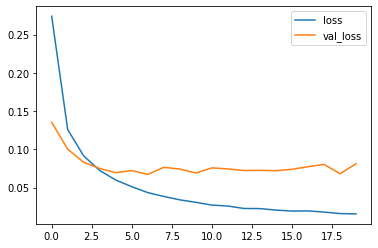

In [ ]:
loss= r.history['loss']
val_loss=r.history['val_loss']

plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()

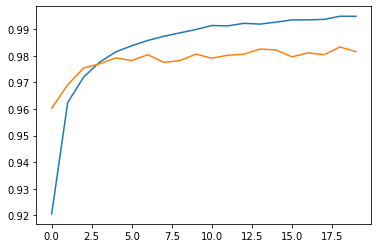

In [ ]:
acc=r.history['accuracy']
val_acc=r.history['val_accuracy']

plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')

In [ ]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.9815
[0.08110003918409348, 0.9815000295639038]


In [ ]:
!pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


Confusion matrix, without normalization
[[ 967    1    2    1    0    1    2    1    2    3]
 [   0 1129    1    2    0    1    0    0    2    0]
 [   1    1 1008    5    3    0    2    5    6    1]
 [   0    0    2  994    0    5    0    2    1    6]
 [   0    0    1    1  970    0    2    1    0    7]
 [   1    0    0   10    1  874    1    0    3    2]
 [   2    2    0    1    5    6  940    0    2    0]
 [   1    2    8    4    0    0    0 1008    1    4]
 [   3    0    2   12    4    8    0    6  935    4]
 [   1    3    0    2    8    3    0    2    0  990]]


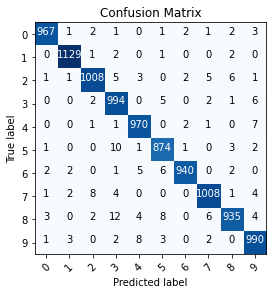

In [ ]:
#confussion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):


  if normalize:
    cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)


  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar
  tick_marks= np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt ='.2f' if normalize else 'd'

  thresh = cm.max()/2


  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
               horizontalalignment='center',
               color='white' if cm[i,j]>thresh else 'black')
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm= confusion_matrix(y_test, p_test)

plot_confusion_matrix(cm,list(range(10)))
      

Text(0.5, 1.0, 'True label : 2 Predicted : 3')

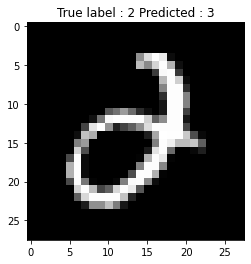

In [ ]:
#show misclassified examples

misclassified_idx= np.where(p_test!=y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label : %s Predicted : %s' % (y_test[i],p_test[i]))